In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as pt
import os
path = "https://raw.githubusercontent.com/Dipannita9991/Machine_Learning/main/imdb_top_1000.csv"
df = pd.read_csv(path,index_col=0)
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
Poster_Link,,,,,,,,,,,,,,,
"https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UX67_CR0,0,67,98_AL_.jpg",The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
"https://m.media-amazon.com/images/M/MV5BM2MyNjYxNmUtYTAwNi00MTYxLWJmNWYtYzZlODY3ZTk3OTFlXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UY98_CR1,0,67,98_AL_.jpg",The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
"https://m.media-amazon.com/images/M/MV5BMTMxNTMwODM0NF5BMl5BanBnXkFtZTcwODAyMTk2Mw@@._V1_UX67_CR0,0,67,98_AL_.jpg",The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
"https://m.media-amazon.com/images/M/MV5BMWMwMGQzZTItY2JlNC00OWZiLWIyMDctNDk2ZDQ2YjRjMWQ0XkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UY98_CR1,0,67,98_AL_.jpg",The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
"https://m.media-amazon.com/images/M/MV5BMWU4N2FjNzYtNTVkNC00NzQ0LTg0MjAtYTJlMjFhNGUxZDFmXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg",12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [83]:
df.shape

(1000, 16)

In [84]:
df.dtypes

,0
Poster_Link,object
Series_Title,object
Released_Year,object
Certificate,object
Runtime,object
Genre,object
IMDB_Rating,float64
Overview,object
Meta_score,float64
Director,object


In [85]:
df.isnull().sum()

,0
Poster_Link,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


In [86]:
data = df
data.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [87]:
#Missing data handling
data = data.drop(['Poster_Link', 'Overview'], axis=1)

In [88]:
data = data.dropna(subset=["Gross"])
data["Gross"] = data["Gross"].str.replace(",","").astype("float64")


<ipython-input-88-163eec064938>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Gross"] = data["Gross"].str.replace(",","").astype("float64")


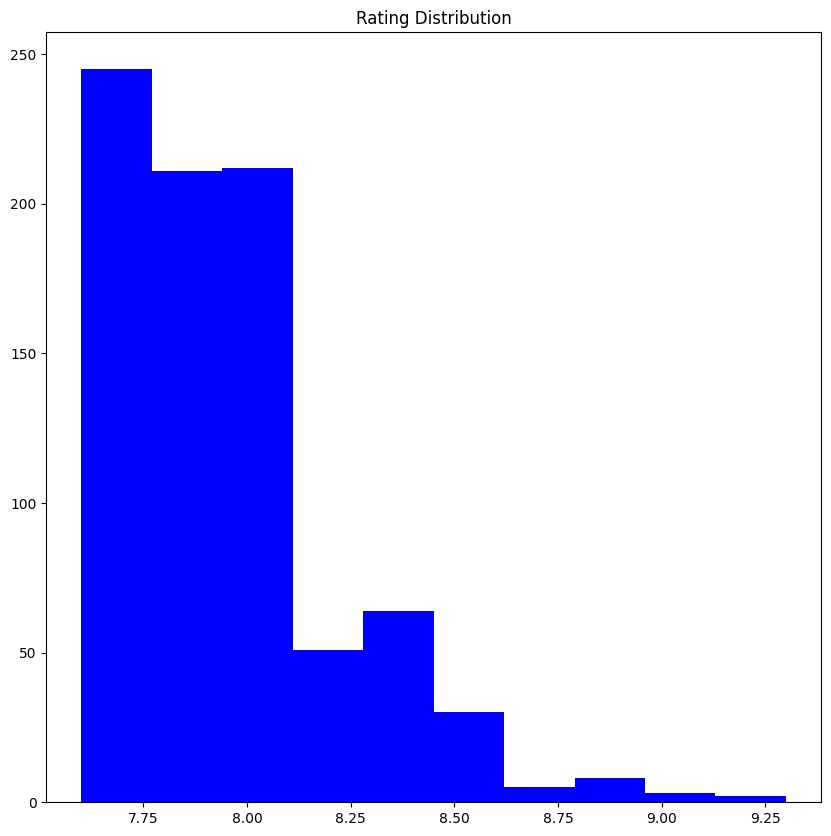

In [89]:
#Univariate Analysis
plt.figure(figsize=(10,10))
plt.hist(data['IMDB_Rating'], color='b')
plt.title("Rating Distribution");

In [90]:
data['IMDB_Rating'].skew()

1.0797589211169327

In [91]:
print("Median of IMDB Rating:", data['IMDB_Rating'].median())

Median of IMDB Rating: 7.9


In [103]:
Genre = data["Genre"].str.split(",").str[0].value_counts().reset_index()
fig = pt.bar(Genre , x = "Genre" , y = "count" , color = "Genre" , title = "Movie from each genre")
fig.show()

In [101]:
certificate = df["Certificate"].value_counts().reset_index()
fig = pt.bar(certificate , x = "Certificate" , y = "count" , color = "Certificate")
fig.show()

<Axes: title={'center': 'Certificate of Dramas'}, ylabel='count'>

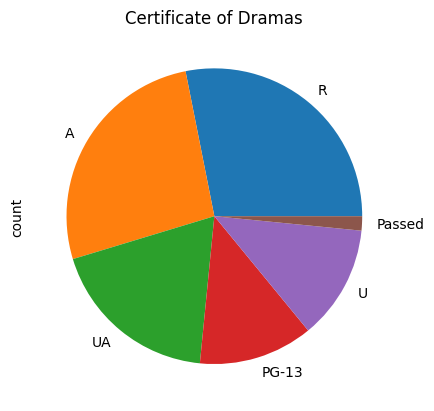

In [112]:
drama = data[data["Genre"] == "Drama"]
drama['Certificate'].value_counts().plot(kind="pie", title= "Certificate of Dramas")

In [105]:
year= pd.DataFrame(data.groupby("Released_Year")["Released_Year"].count()).rename(columns = {"Released_Year":"Movie_count"}).reset_index()
pt.line(year, x="Released_Year", y = "Movie_count", title= "Number of movies each year")

<Axes: xlabel='Run_time'>

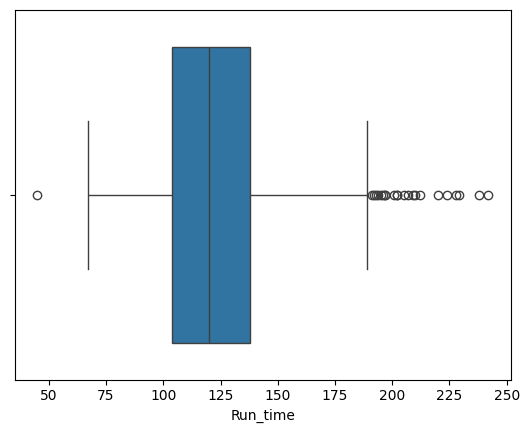

In [106]:
data["Run_time"] =  data["Runtime"].str.split(" ").str[0].astype(int)
sns.boxplot(data, x= "Run_time")

In [110]:
data[data["No_of_Votes"] == 2343110]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Run_time
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,142


In [111]:
data[data["Star1"] == "Shah Rukh Khan"][["Series_Title" , "Released_Year" , "Genre" , "Gross"]]

,Series_Title,Released_Year,Genre,Gross
148,Chak De! India,2007,"Drama, Family, Sport",1113541.0
156,"Swades: We, the People",2004,Drama,1223240.0
352,My Name Is Khan,2010,Drama,4018695.0
629,Veer-Zaara,2004,"Drama, Family, Musical",2921738.0


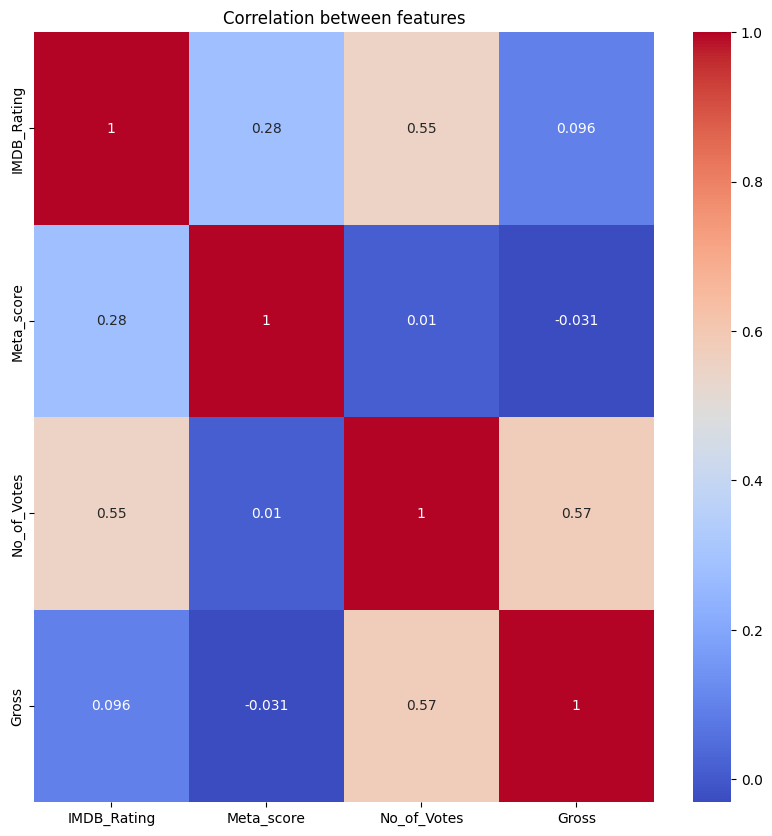

In [94]:
# Bivariate analysis
numeric_data = data.select_dtypes(include=[np.number])
correlation_mat = numeric_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_mat, annot=True, cmap='coolwarm')
plt.title("Correlation between features")
plt.show()

Text(0.5, 1.0, 'Gross income of top rated movies')

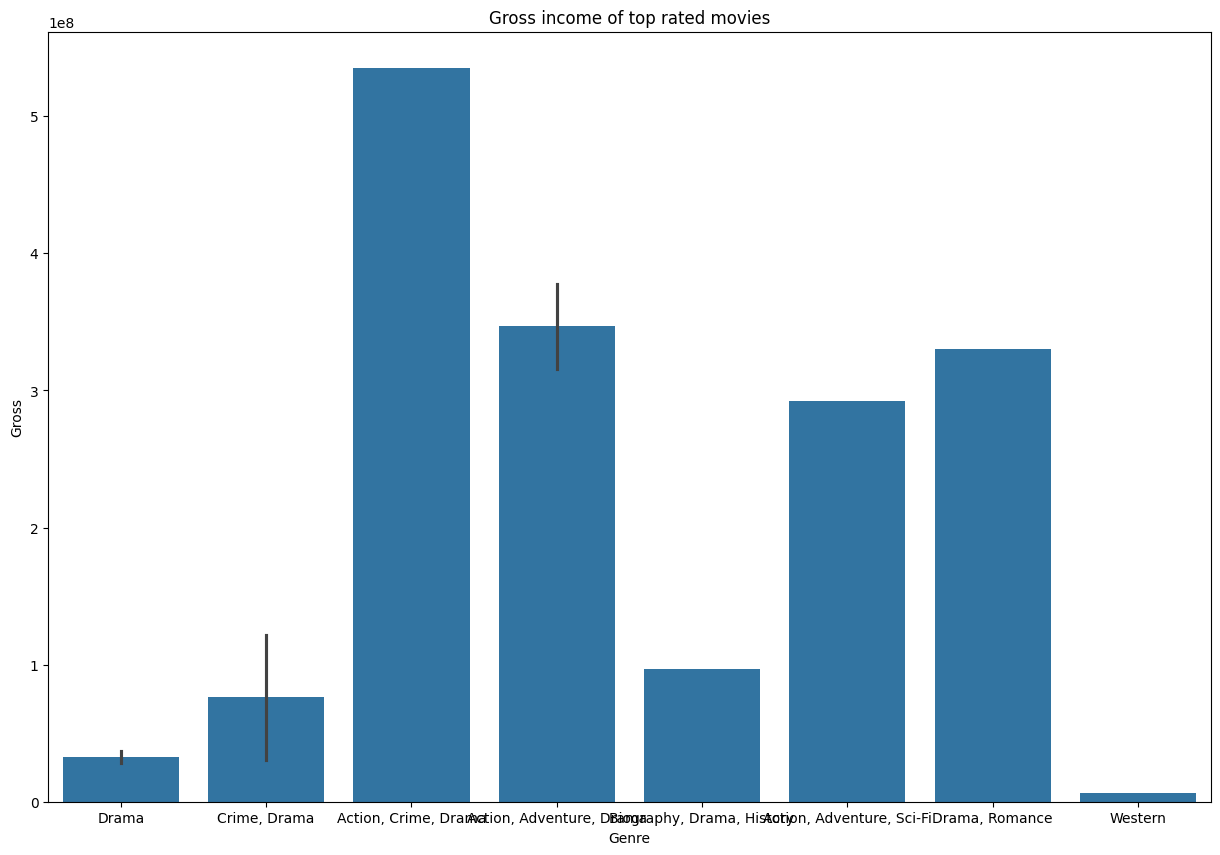

In [95]:
plt.figure(figsize=(15,10))
top_rated=data[data["IMDB_Rating"] >= 8.8]
sns.barplot(data=top_rated, x = "Genre", y = "Gross")
plt.title("Gross income of top rated movies")